<h3 align="center">PETR 5397 Petroleum Data Analytics</h3> 
<h3 align="center">Summer 2022 Midterm Exam - 07/06/22</h3> 
<h3 align="center">100 Total Points</h3> 

Edit this cell with your name and ID. <br>

__Name__: Sachin Shubham

__ID__: 1524147

------------
__Background about the data__:
When drilling a well there are various important features
that are captured. These features include but are not
limited to weight on bit (WOB), rpm, gamma, hook load, torque, differential pressure, and Rate of Penetration (ROP).
ROP is an important feature that that must be predicted or optimized in advance.
Maximizing ROP is the absolute goal in drilling.

In this question you are required to build a supervised regression machine learning model where ROP is the target/output.


The data provided in this question are as follows:
- Hole depth (is the measured depth or MD in ft). Should be only greater than zero (+ve)
- Hook load (Klbs)
- Rotary rpm
- Rotary torque (Klbs-ft)
- Weight on bit (WOB in Klbs)
- Differential pressure (psi)
- Gamma ray at bit (gAPI)
- Rate Of Penetration (ROP) ft/hr.
<br>

__Instructions :__
- Make sure you have well documented, and clean code.
- Add more cells if needed.
- You are welcome to use the suggested imported libraries or import your preferred libraries when needed.

------------
1-  __(5 points)__ import data 'Midterm_ROP_DataSet.csv' into a dataframe named __df__.<br>
2-  __(5 points)__ Perfrom Summary Statistics. What are your observations?<br>
3-  __(5 points)__ Print unique values of column __Rotary RPM__.<br>
4-  __(5 points)__ Replace any of `[np.inf, -np.inf, np.inf, -999., -999, 999, '', " ", 'inf', 'NaN']` with `np.nan`.<br>
5-  __(5 points)__ Check for missing data. What are your observations?<br>
6-  __(5 points)__ At what depth do we have NaN (missing data)?<br>
7-  __(10 points)__ Use your best judgment to treat the missing data (dropping, imputation techniques,…. etc). Comment on your selection.<br>
8-  __(10 points)__ Perform Exploratory Data Analytics (EDA). Comment on your findings and your EDA conclusions.<br>
9-  __(5 points)__ Scale your data using `MinMAxScaler` from `sklearn` library. Name your new dataframe as __df_scaled__ <br>
10- __(5 points)__ Split your data into `X_train, X_test,y_train, y_test` using  30% of your data for testing and random `seed=1000`.<br>
11- __(20 points)__ Using the training dataset, train an Extra Tree regressor model, and evaluate the model using the testing dataset. <br>
Use the following hyperparameters:
- `n_estimators=100`
- `criterion='mse'`
- `max_depth=None `
- `min_samples_split=2`
- `min_samples_leaf=1` <br>

12- __(20 points)__ Using the training dataset, train an random forest regression model, and evaluate the model using the testing dataset. <br>
Use the following hyperparameters: 
- `n_estimators = 100` 
- `max_features='sqrt'`
- `min_samples_leaf= 20` <br>

13- __(5 points)__ BONUS: What Feature is the most important for the ROP Prediction. Assign feature importance to each feature.

------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn('Do not show this message')
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

1- import data 'MidtermB_ROP_DataSet.csv' into a dataframe named df.<br>

In [2]:
#Your Code Here
#load the data
df = pd.read_csv('Midterm_ROP_DataSet.csv')

In [3]:
df.head()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
0,6524,117.5,29,6.702,15.6,370.6,134.12,34.29
1,6525,116.9,29,4.345,10.2,202.9,136.47,34.04
2,6526,112.5,29,5.151,10.2,359.0,134.12,34.17
3,6527,113.1,29,5.016,9.4,332.6,138.82,34.48
4,6528,110.8,29,5.510,10.6,343.7,141.18,34.31


In [4]:
#shape
df.shape

(7935, 8)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hole Depth             7935 non-null   int64  
 1   Hook Load              7931 non-null   float64
 2   Rotary RPM             7935 non-null   int64  
 3   Rotary Torque          7935 non-null   float64
 4   Weight on Bit          7935 non-null   float64
 5   Differential Pressure  7935 non-null   float64
 6   Gamma at Bit           7935 non-null   float64
 7   Rate Of Penetration    7935 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 496.1 KB


In [6]:
df.columns

Index(['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'Differential Pressure', 'Gamma at Bit',
       'Rate Of Penetration'],
      dtype='object')

2- Perfrom Summary Statistics. What are your observations?

In [7]:
#Your Code Here
summary_statistics=df.describe(include='all').transpose()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
Hole Depth,7935.0,10484.787524,2306.885010,-14454.000,8499.500,10487.000,12469.500,14454.00
Hook Load,7931.0,129.673106,7.720494,107.200,123.800,129.500,134.400,156.40
Rotary RPM,7935.0,65.835791,27.062600,-999.000,49.000,70.000,90.000,101.00
Rotary Torque,7935.0,11.460365,3.386803,2.701,9.096,11.373,14.198,20.05
Weight on Bit,7935.0,19.827309,5.611646,0.000,16.300,20.400,23.900,39.40
Differential Pressure,7935.0,520.270573,142.475611,2.900,429.400,565.900,627.700,783.30
Gamma at Bit,7935.0,211.782641,81.531795,54.120,148.240,204.710,235.290,600.00
Rate Of Penetration,7935.0,143.112973,55.736881,1.610,100.160,161.160,185.240,259.29


In [8]:
df.median()

Hole Depth               10487.000
Hook Load                  129.500
Rotary RPM                  70.000
Rotary Torque               11.373
Weight on Bit               20.400
Differential Pressure      565.900
Gamma at Bit               204.710
Rate Of Penetration        161.160
dtype: float64

In [9]:
rt_rop = df[['Rotary Torque','Rate Of Penetration']].groupby('Rotary Torque').mean()
rt_rop

,Rate Of Penetration
Rotary Torque,
2.701,22.840000
3.023,15.080000
3.296,19.830000
3.405,29.860000
3.491,29.750000
...,...
20.016,184.873333
20.020,192.975000
20.024,180.280000


Put your comment here:

Mean 'Rate of Penetration' is 143.140830, median is 161.170 and standard deviation is 3.385341.

Min 'Weight on Bit' is 0.00	

Min 'Hole Depth' is -14454.000

Min 'Rotary RPM' is -999

3- Print unique values of column __Rotary RPM__.What are your observations?<br>

In [10]:
#Your Code Here
df['Rotary RPM'].unique()

array([  29, -999,   30,   40,   32,   39,   50,   49,   44,   51,   58,
          9,   10,   24,   25,   14,   15,  100,  101,   99,   60,   41,
         79,   80,   86,   81,   52,   53,   31,   45,   69,   70,   71,
         35,   54,   65,   90,   91,   89], dtype=int64)

all the values looks good except -999

In [11]:
#Hole Depth : Should be only greater than zero (+ve)
df=df[df['Hole Depth']>0]

In [12]:
df.shape

(7934, 8)

3- Replace any of `[np.inf, -np.inf, np.inf, -999, 999, '', " ", 'inf', 'NaN']` with `np.nan`.<br>

In [13]:
#Your Code Here
df.replace("-999", np.nan, inplace = True)

3- Check for missing data.

In [14]:
#Your Code Here
missing_data = df.isnull()
missing_data.head(5)

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [15]:
#check for missing values in each column and get the count of it
for column in missing_data.columns.values.tolist():
    print(column) 
    print (missing_data[column].value_counts())
    print("")

Hole Depth
False    7934
Name: Hole Depth, dtype: int64

Hook Load
False    7930
True        4
Name: Hook Load, dtype: int64

Rotary RPM
False    7934
Name: Rotary RPM, dtype: int64

Rotary Torque
False    7934
Name: Rotary Torque, dtype: int64

Weight on Bit
False    7934
Name: Weight on Bit, dtype: int64

Differential Pressure
False    7934
Name: Differential Pressure, dtype: int64

Gamma at Bit
False    7934
Name: Gamma at Bit, dtype: int64

Rate Of Penetration
False    7934
Name: Rate Of Penetration, dtype: int64



Put your comments/observations here:

'Hook Load' has four missing values

7- Use your best judgment to treat the missing data (dropping, imputation techniques,…. etc). Comment on your selection.<br>

In [16]:
#Your Code Here
# simply drop whole row with NaN in "Hook Load" column
df.dropna(subset=["Hook Load"], axis=0, inplace=True)

# reset index, because we droped four rows
df.reset_index(drop=True, inplace=True)

In [17]:
#null count
df.isnull().sum()

Hole Depth               0
Hook Load                0
Rotary RPM               0
Rotary Torque            0
Weight on Bit            0
Differential Pressure    0
Gamma at Bit             0
Rate Of Penetration      0
dtype: int64

In [18]:
df.shape

(7930, 8)

Put your comments/observations here:

As In 'Hook Load' column just 4 data is missing, so we will drop the rows of it and reset the index.

8- Perform Exploratory Data Analytics (EDA). Comment on your findings and your EDA conclusions.<br>

<AxesSubplot:>

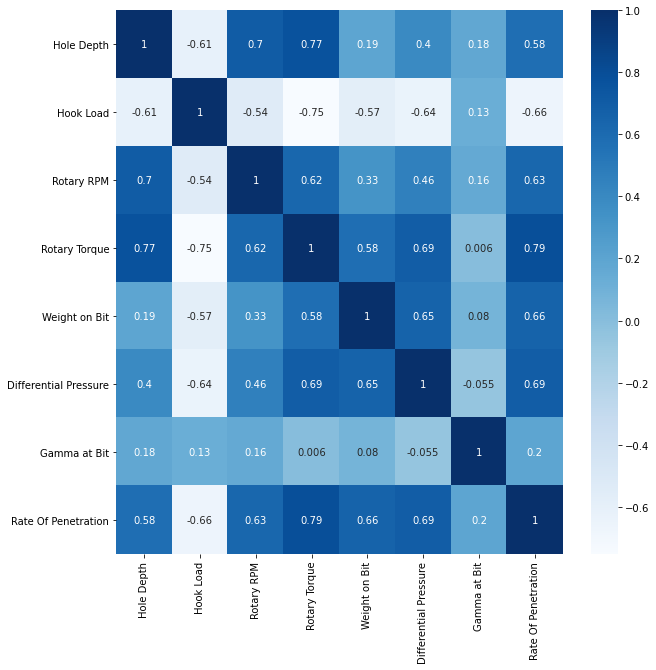

In [19]:
# Your code here
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

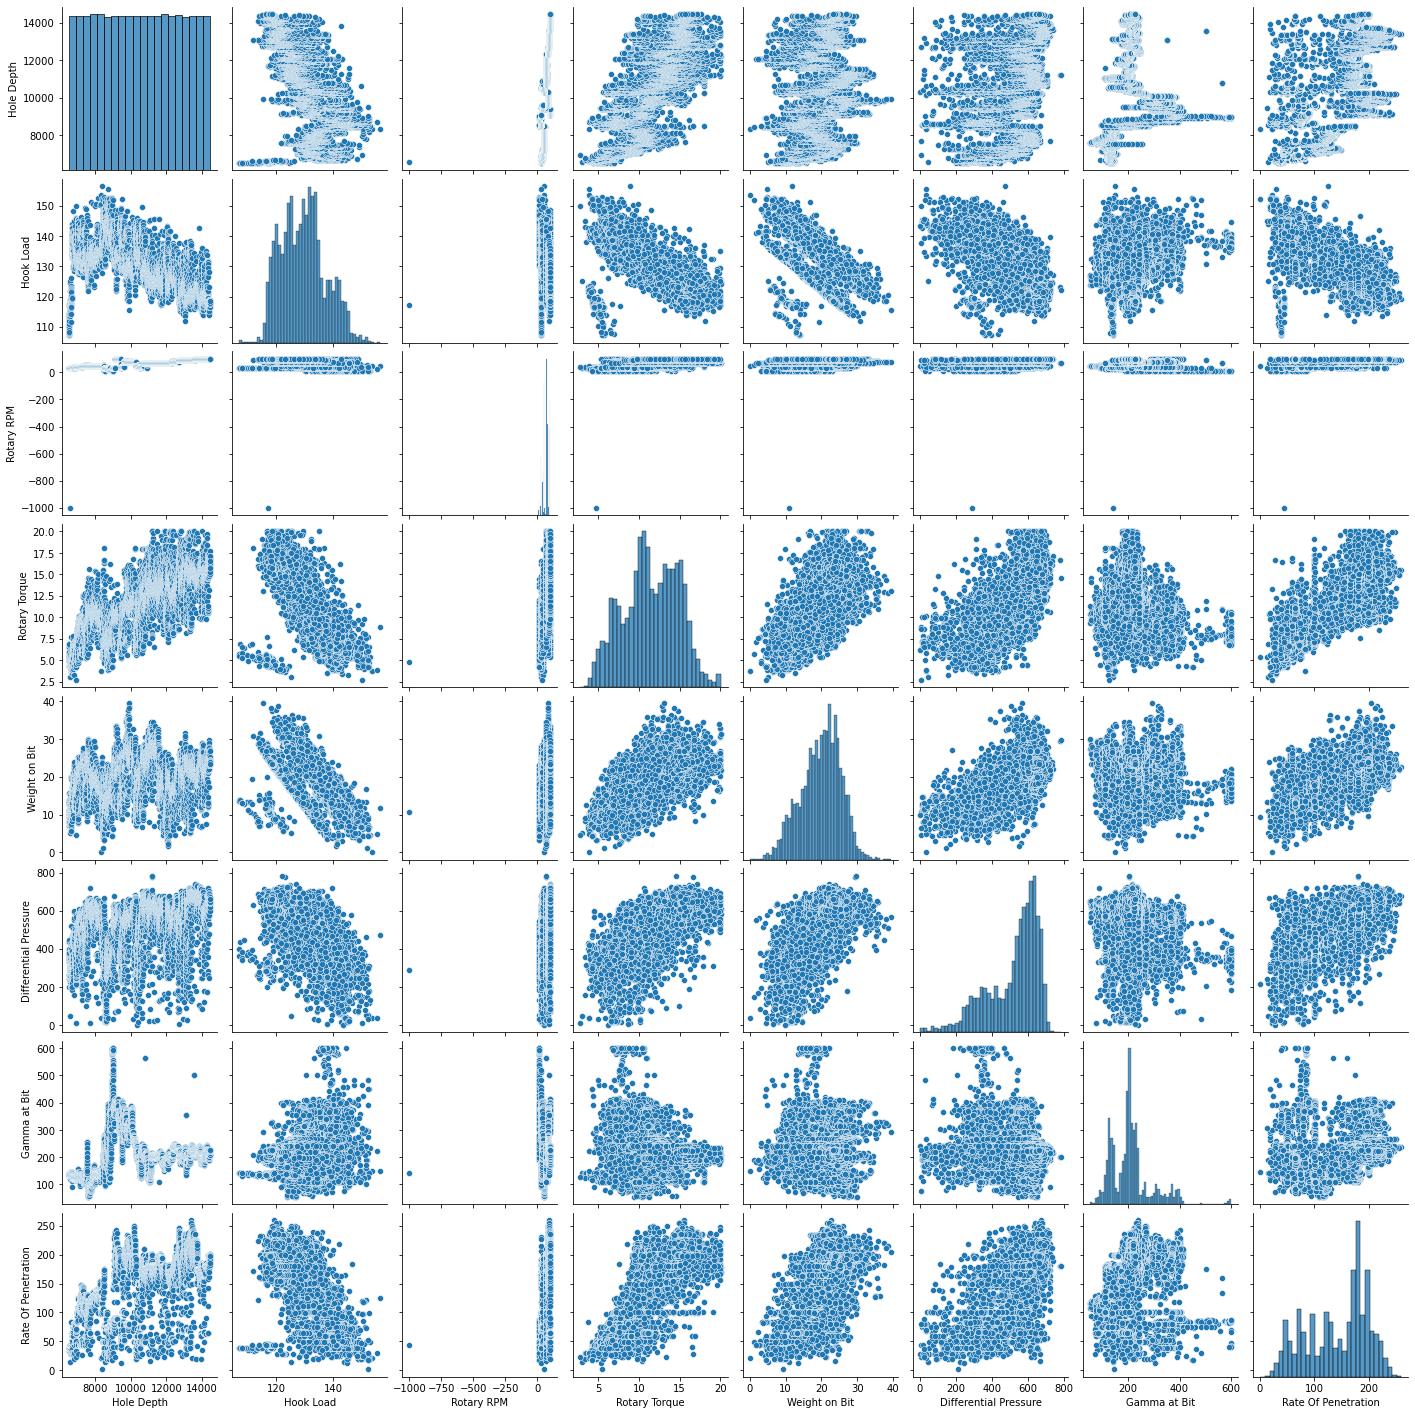

In [20]:
# create pairplot 
sns.pairplot(df)
# to show
plt.show()

In [21]:
#create a histogram plot for all columns one by one
for i in df.columns:
    df[i].iplot(kind='box',color='green',title=str('Box Plot of '+str(i)))

Rate of Penetration is strongly correlated to Rotary Torque
    

9- Scale your data using `MinMAxScaler` from `sklearn` library. Name your new dataframe as __df_scaled__ <br>

In [22]:
#Your Code Here
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# fit and transform data
df_scaled=scaler.fit_transform(df)
print(df_scaled)

[[0.00000000e+00 2.09349593e-01 9.34545455e-01 ... 4.71168631e-01
  1.46552356e-01 1.26823968e-01]
 [1.26103405e-04 1.97154472e-01 9.34545455e-01 ... 2.56278831e-01
  1.50857331e-01 1.25853772e-01]
 [2.52206810e-04 1.07723577e-01 9.34545455e-01 ... 4.56304459e-01
  1.46552356e-01 1.26358274e-01]
 ...
 [9.99747793e-01 2.25609756e-01 9.99090909e-01 ... 8.24833419e-01
  3.10342933e-01 7.64320087e-01]
 [9.99873897e-01 2.19512195e-01 9.99090909e-01 ... 8.45720144e-01
  3.14647908e-01 7.64320087e-01]
 [1.00000000e+00 2.29674797e-01 9.99090909e-01 ... 8.41491543e-01
  3.14647908e-01 7.11968333e-01]]


In [23]:
#create a scale data frame
df_new = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_new.head()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
0,0.000000,0.209350,0.934545,0.230618,0.395939,0.471169,0.146552,0.126824
1,0.000126,0.197154,0.934545,0.094761,0.258883,0.256279,0.150857,0.125854
2,0.000252,0.107724,0.934545,0.141219,0.258883,0.456304,0.146552,0.126358
3,0.000378,0.119919,0.934545,0.133437,0.238579,0.422476,0.155162,0.127561
4,0.000504,0.073171,0.934545,0.161911,0.269036,0.436699,0.159486,0.126902


In [24]:
df_new.shape

(7930, 8)

In [25]:
X, y = df_new.iloc[:, :-1], df_new.iloc[:, -1]

10- Split your data into `X_train, X_test,y_train, y_test` using  30% of your data for testing and random `seed=1000`.

In [26]:
#Your Code Here
from sklearn.model_selection import train_test_split
np.random.seed(1000)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5551, 7) (5551,)
Test set: (2379, 7) (2379,)


11- Using the training dataset, train an Extra Tree regressor model, and evaluate the model using the testing dataset. <br>
Use the following hyperparameters:
- n_estimators=100
- criterion='mse'
- max_depth=None 
- min_samples_split=2
- min_samples_leaf=1 <br>

In [27]:
# This is a pre-Defined evaluation function for calculating some helpful metrics. You may use it to evaluate your model.
# This function calculates the mean square error and the square root of the MSE for our prediction model.
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

def evaluate (model, test_features, test_labels):
    predictions=model.predict(test_features)
    r2=r2_score(y_pred=predictions, y_true=test_labels)
    MAE=mean_absolute_error(test_labels, predictions)
    MSE=mean_squared_error(test_labels, predictions)
    rmse = sqrt(MSE)

    print('r2 = {:0.2f}'.format(r2))
    print('MAE = {:0.2f}'.format(MAE))
    print('Mean Square Error = {:0.2f}'.format(MSE))
    print('Squareroot Mean Square Error = {:0.2f}'.format(rmse))

In [28]:
# Your code here
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [29]:
result=model.fit(X_train,y_train)

In [30]:
result.score(X_test, y_test)

0.9449423802111452

In [31]:
evaluate(result,X_test,y_test)

r2 = 0.94
MAE = 0.03
Mean Square Error = 0.00
Squareroot Mean Square Error = 0.05


In [32]:
#tree visualization
#limit the depth of tree to 5 levels
model_small = ExtraTreesRegressor(n_estimators=15, max_depth = 5, criterion='mse', min_samples_split=2, min_samples_leaf=1)
model_small.fit(X_train,y_train)
#take one tree from the forest
tree = model_small.estimators_[1]
#export the image to a dot file
export_graphviz(tree, out_file = '_tree_.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('_tree_.dot')
#graph to a png file
graph.write_png('_tree_.png');
#get the image
Image(url="_tree_.png", width=1000, height=500)

12- Using the training dataset, train an random forest regression model, and evaluate the model using the testing dataset. <br>
Use the following hyperparameters:
- n_estimators = 100, 
- max_features='sqrt'
- min_samples_leaf= 20 <br>

In [33]:
#Your code here
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_features='sqrt', min_samples_leaf= 20)

In [34]:
result_=model.fit(X_train,y_train)

In [35]:
result_.score(X_test, y_test)

0.9039929150545865

In [36]:
evaluate(result_,X_test,y_test)

r2 = 0.90
MAE = 0.04
Mean Square Error = 0.00
Squareroot Mean Square Error = 0.07


In [37]:
#tree visualization
#take one tree from the forest
tree_ = result_.estimators_[1]
#export the image to a dot file
export_graphviz(tree_, out_file = 'tree_.dot', feature_names = list(X.columns), rounded = True, precision = 1)
#dot file to create a graph
(graph_, ) = pydot.graph_from_dot_file('tree_.dot')
#graph to a png file
graph_.write_png('tree_.png')
#get the image
Image(url="tree_.png", width=1000, height=500)

13-  __(5 points)__ BONUS: What Feature is the most important for the EOR_Method Prediction. Assign feature importance to each feature.

In [38]:
feature_importance = result_.feature_importances_
std = np.std([i.feature_importances_ for i in result_.estimators_], axis=0)

Text(0, 0.5, 'Feature Importance')

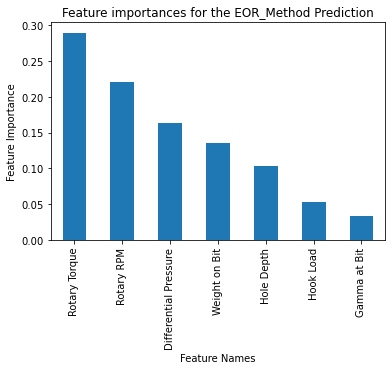

In [39]:
import pandas as pd

forest_importance = pd.Series(feature_importance, index=X.columns).nlargest(7)
fig, ax = plt.subplots()
forest_importance.plot.bar()
ax.set_title("Feature importances for the EOR_Method Prediction")
ax.set_xlabel('Feature Names')
ax.set_ylabel("Feature Importance")

"Rotary Torque" Feature is the most important for the EOR_Method Prediction

hint
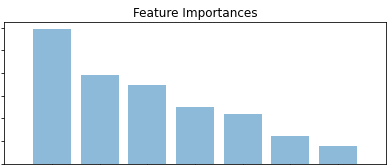